In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
from wordcloud import WordCloud
%matplotlib inline  
sns.set_style('whitegrid')
sns.set_context('notebook')

#### Read the Data

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5Thgeneration Orchestration     Wrightburgh     0     Tunisia   
1     Monitored National Standardization       West Jodi     1       Nauru   
2       Organic Bottom-Line Service-Desk        Davidton     0  San Marino   
3  Triple-Buffered Reciprocal Time-Frame  West Terrifurt     1       Italy   
4          Robust Logistical Utilization    South Manuel     0     Iceland   

          Timestamp  Clicked on Ad  
0  27-03-2016 00:53              0  
1  04-04-2016 01:39              0  
2  13-03-2016 20:35              0  
3  10-01-2016 02:31              0  
4  03-06-2016 03:36              0

#### EDA

In [6]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.shape

(1000, 10)

In [8]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

In [12]:
df.describe().T

count                        mean  \
Daily Time Spent on Site  1000.0                     65.0002   
Age                       1000.0                      36.009   
Area Income               1000.0                 55000.00008   
Daily Internet Usage      1000.0                    180.0001   
Male                      1000.0                       0.481   
Timestamp                   1000  2016-04-10 10:33:36.840000   
Clicked on Ad             1000.0                         0.5   

                                          min                  25%  \
Daily Time Spent on Site                 32.6                51.36   
Age                                      19.0                 29.0   
Area Income                           13996.5           47031.8025   
Daily Internet Usage                   104.78               138.83   
Male                                      0.0                  0.0   
Timestamp                 2016-01-01 02:52:00  2016-02-18 02:55:15   
Clicked on Ad                             0.0                  0.0   

                                          50%                  75%  \
Daily Time Spent on Site               68.215              78.5475   
Age                                      35.0                 42.0   
Area Income                           57012.3            65470.635   
Daily Internet Usage                   183.13             218.7925   
Male                                      0.0                  1.0   
Timestamp                 2016-04-07 17:27:00  2016-05-31 03:18:00   
Clicked on Ad                             0.5                  1.0   

                                          max           std  
Daily Time Spent on Site                91.43     15.853615  
Age                                      61.0      8.785562  
Area Income                           79484.8  13414.634022  
Daily Internet Usage                   269.96     43.902339  
Male                                      1.0      0.499889  
Timestamp                 2016-07-24 00:22:00           NaN  
Clicked on Ad                             1.0       0.50025

In [13]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                    997
Clicked on Ad                  2
dtype: int64

In [14]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [15]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

#### Data Visualization

In [16]:
numerical_features = []
categorical_features = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_features.append(col)
    else:
        categorical_features.append(col)

In [17]:
print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
Categorical Features : ['Ad Topic Line', 'City', 'Country', 'Timestamp']


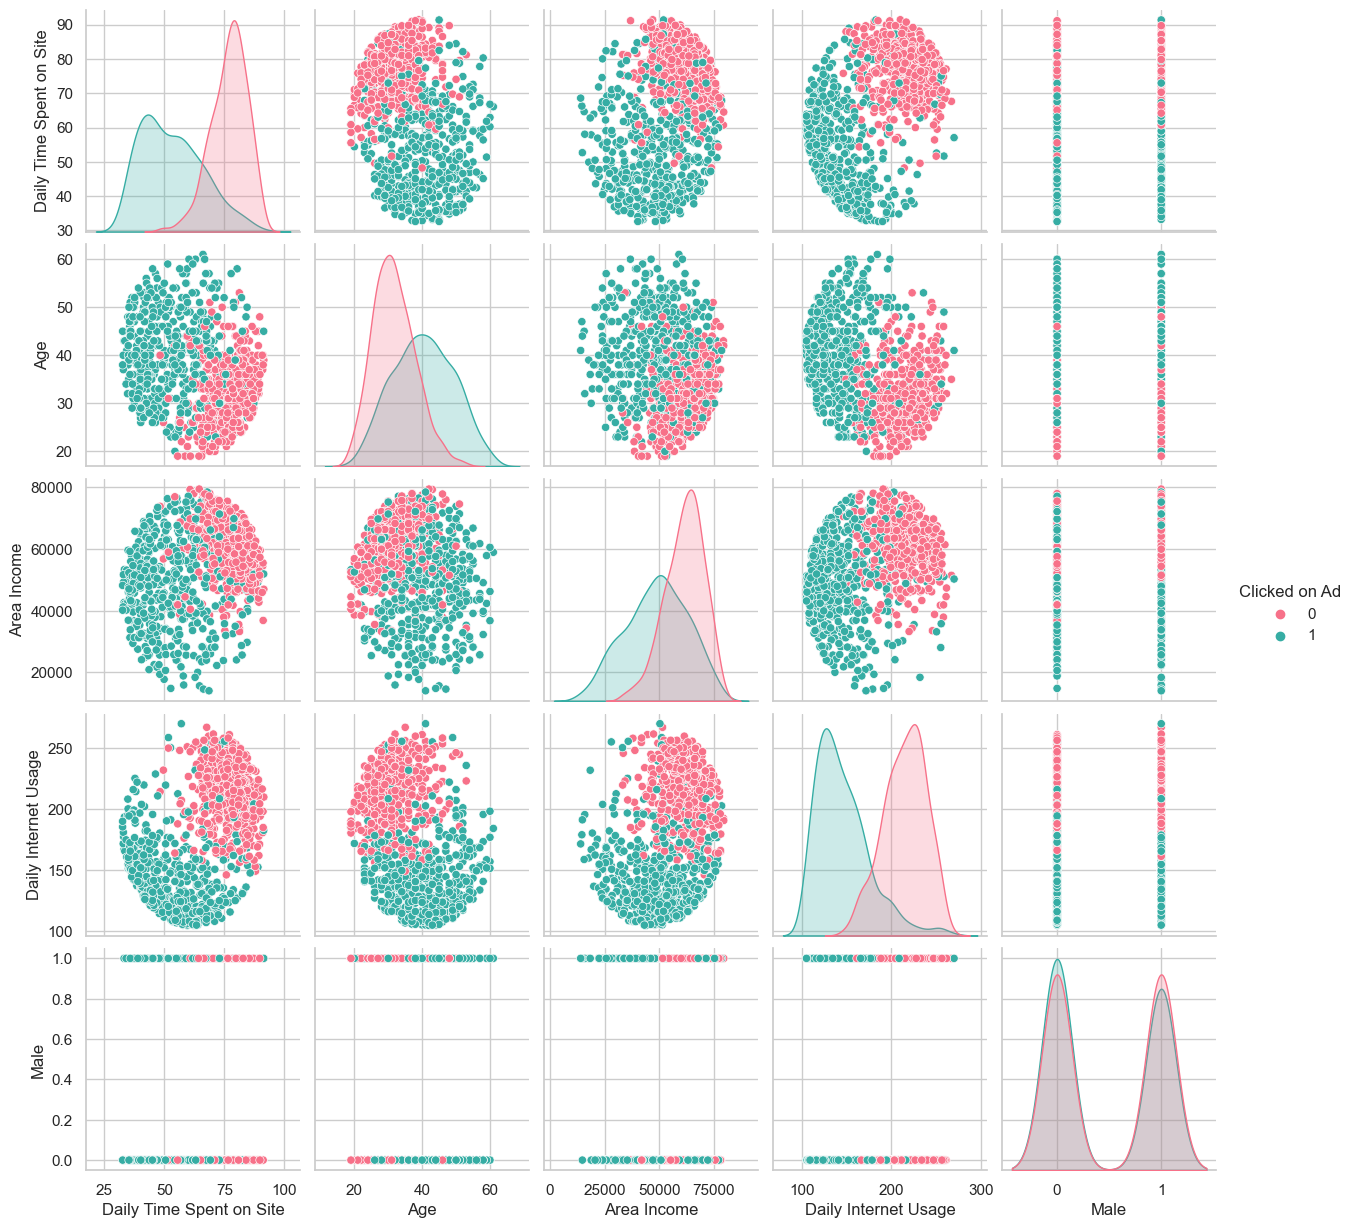

In [18]:
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
                      'Male', 'Clicked on Ad']
numerical_features_df = df[numerical_features]
sns.pairplot(numerical_features_df, diag_kind='kde', hue='Clicked on Ad', palette='husl')
plt.show()

In [19]:
if 'Clicked on Ad' in numerical_features:
    numerical_features.remove('Clicked on Ad')

In [20]:
if 'Male' in numerical_features:
    numerical_features.remove('Male')

In [21]:
print(f'Numerical Features : {numerical_features}')

Numerical Features : ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


#### Univariate Analysis

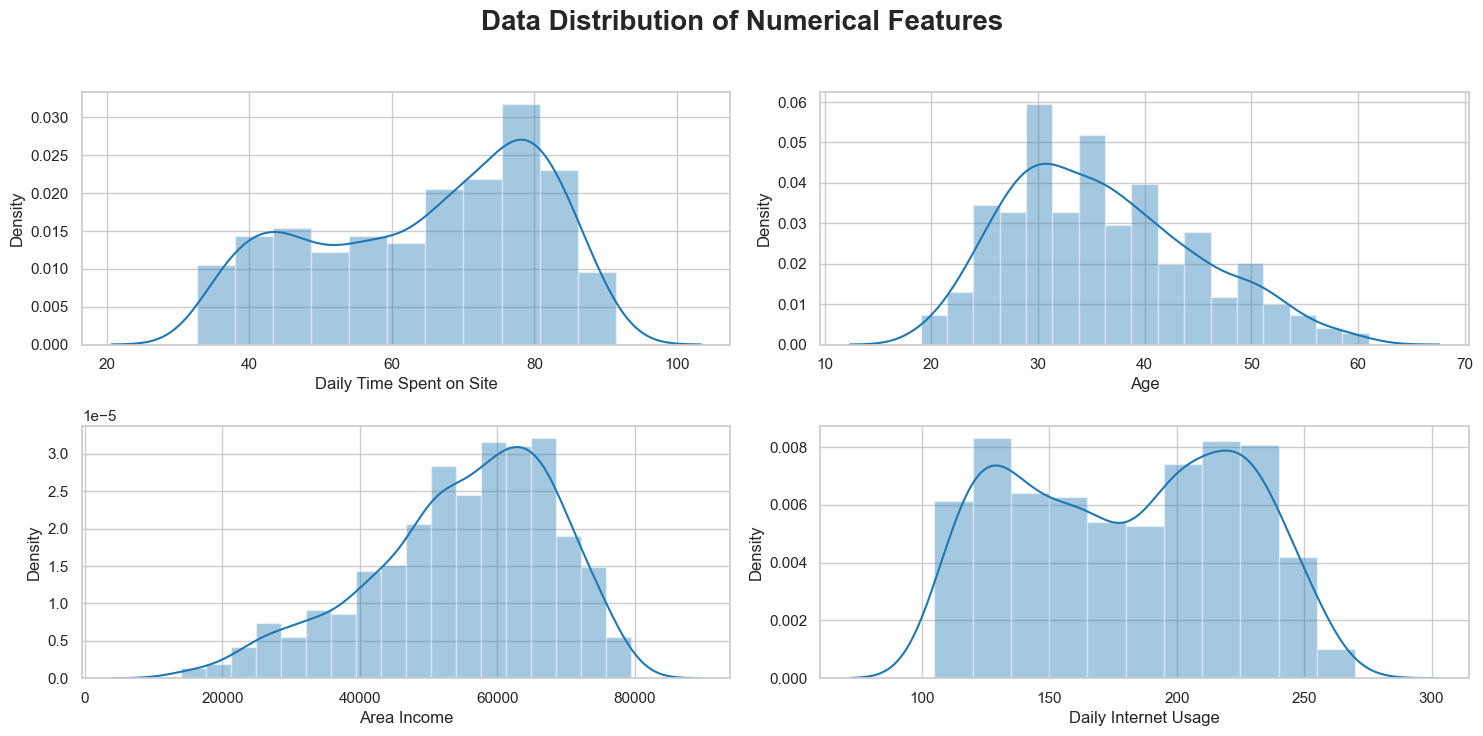

In [22]:
plt.figure(figsize=(15, 10))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i+1)
    sns.distplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [23]:
px.histogram(df,x='Daily Time Spent on Site', color='Clicked on Ad',template="none",color_discrete_sequence= px.colors.sequential.Darkmint)

In [24]:
px.histogram(df,x='Daily Internet Usage', color='Clicked on Ad',template="none",color_discrete_sequence= px.colors.sequential.Teal)

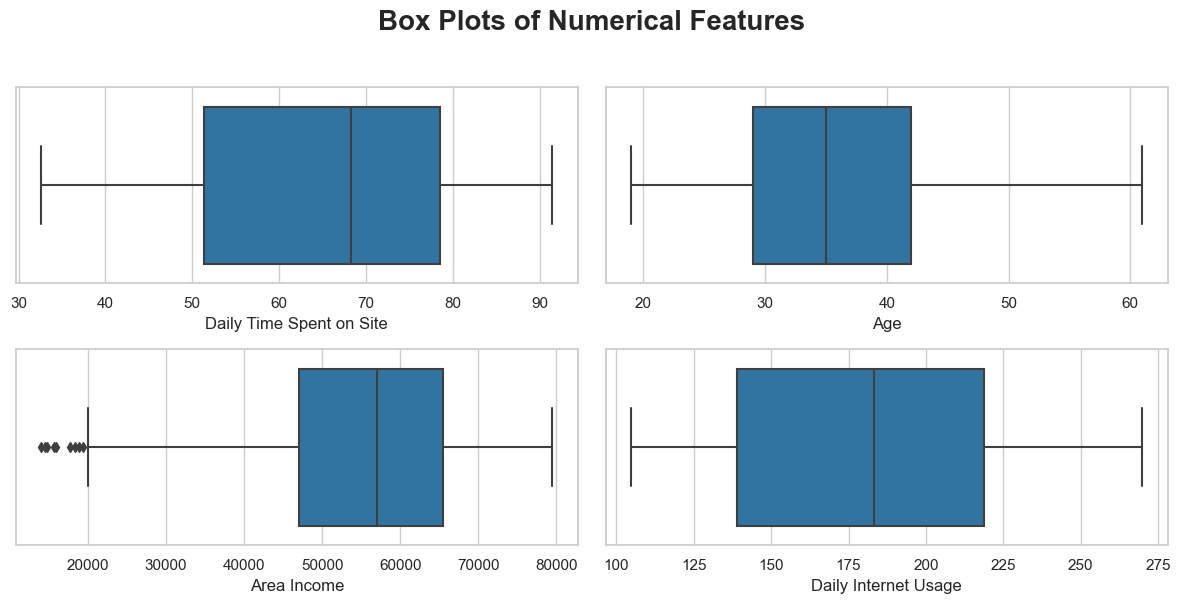

In [25]:
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

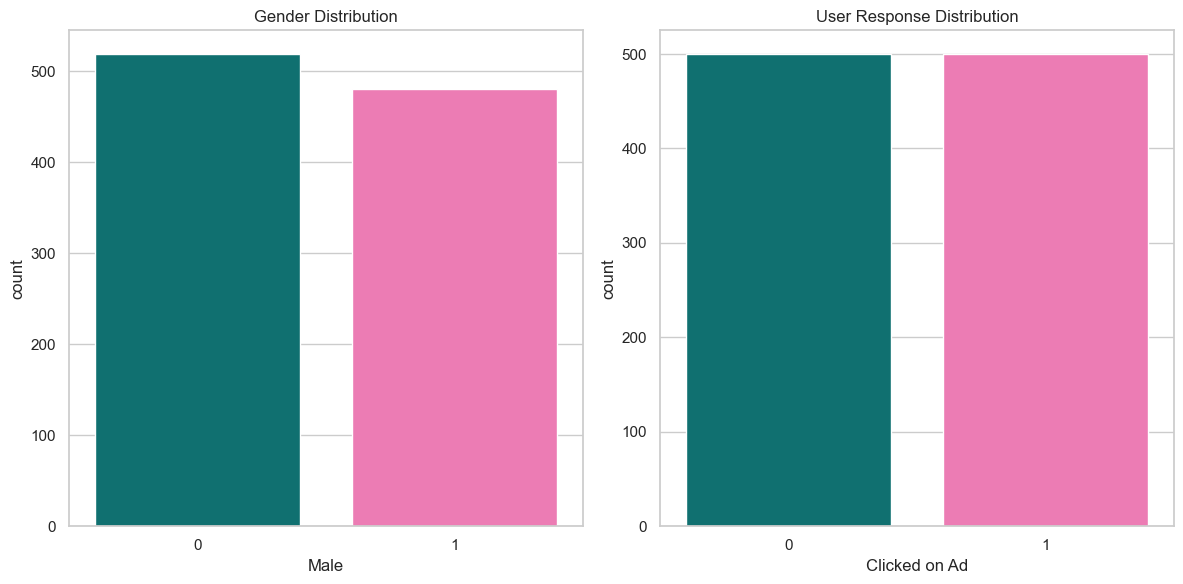

In [26]:
custom_palette = ['#008080', '#ff69b4']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Male', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Gender Distribution')

sns.countplot(x='Clicked on Ad', data=df, ax=axes[1], palette=custom_palette)
axes[1].set_title('User Response Distribution')
plt.tight_layout()
plt.show()

On the basis of Gender ,in our dataset there are more number of Female compared to Male. The frequency for weather Clicked On Ad or Not is Same.

#### Bivariate Analysis

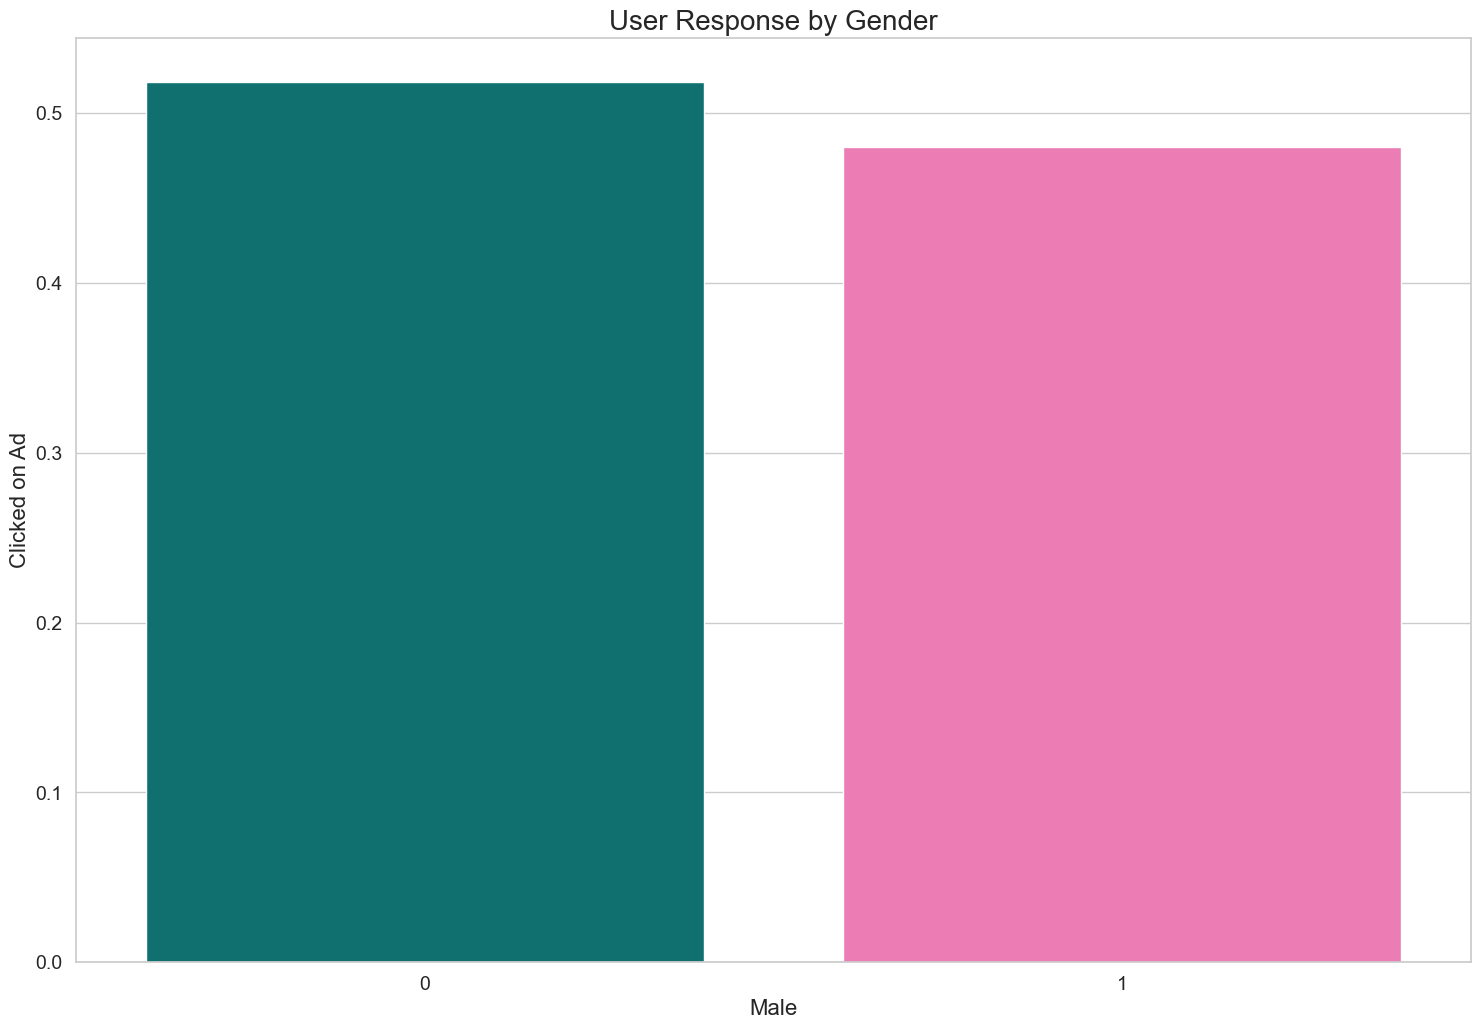

In [27]:
plt.figure(figsize=(18, 12))
ax = sns.barplot(data=df, x='Male', y='Clicked on Ad', ci=None, palette=['teal', 'hotpink'])
ax.set_xlabel('Male', fontsize=16)
ax.set_ylabel('Clicked on Ad', fontsize=16)
ax.set_title('User Response by Gender', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Male tend to respond less to the Advertisements.

In [28]:
bin_edges = [0, 40, 60, 80, 100]
bin_labels = ['0-40', '41-60', '61-80', '81-100']

df['Time Spent Bins'] = pd.cut(df['Daily Time Spent on Site'], bins=bin_edges, labels=bin_labels)
print(df[['Daily Time Spent on Site', 'Time Spent Bins']].head())

   Daily Time Spent on Site Time Spent Bins
0                     68.95           61-80
1                     80.23          81-100
2                     69.47           61-80
3                     74.15           61-80
4                     68.37           61-80


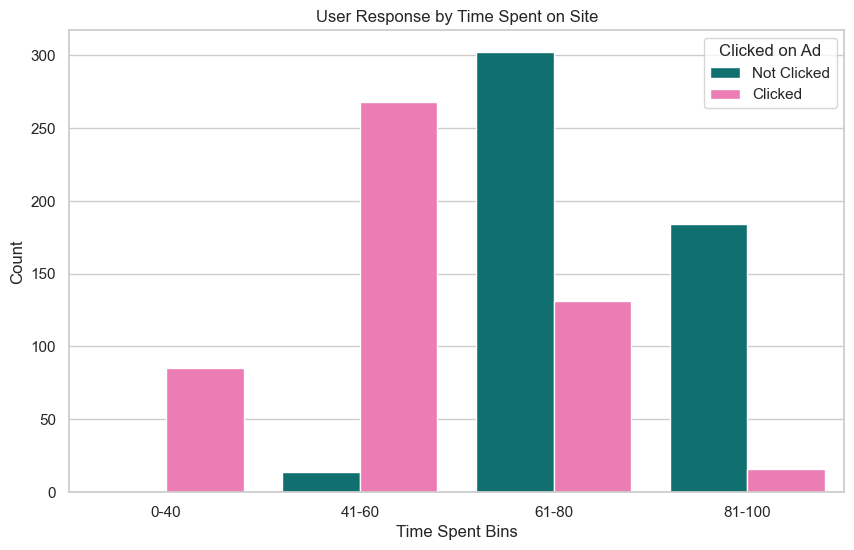

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time Spent Bins', hue='Clicked on Ad', palette=['teal', 'hotpink'])
plt.xlabel('Time Spent Bins')
plt.ylabel('Count')
plt.title('User Response by Time Spent on Site')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['Not Clicked', 'Clicked'], facecolor='white')
plt.show()

As time spent by User increases , the probability for Clicked on Ad decreases.

In [30]:
age_bin_edges = [10, 20, 30, 40, 50, 60, 70]
age_bin_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['Age Bins'] = pd.cut(df['Age'], bins=age_bin_edges, labels=age_bin_labels)
print(df[['Age', 'Age Bins']].head())

   Age Age Bins
0   35    30-39
1   31    30-39
2   26    20-29
3   29    20-29
4   35    30-39


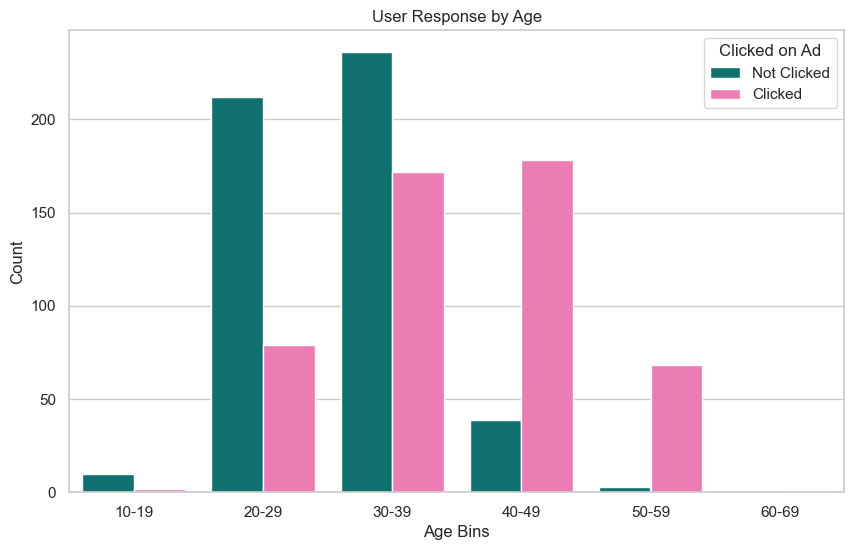

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Bins', hue='Clicked on Ad', palette=['teal', 'hotpink'])
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('User Response by Age')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['Not Clicked', 'Clicked'], facecolor='white')

plt.show()

Elder people tend to Click on Advertisement more as compared to Younger Generation.

In [32]:
income_bin_edges = [10000, 30000, 50000, 70000, 90000]
income_bin_labels = ['10k-30k', '30k-50k', '50k-70k', '70k-90k']

df['Income Bins'] = pd.cut(df['Area Income'], bins=income_bin_edges, labels=income_bin_labels)
print(df[['Area Income', 'Income Bins']].head())

   Area Income Income Bins
0     61833.90     50k-70k
1     68441.85     50k-70k
2     59785.94     50k-70k
3     54806.18     50k-70k
4     73889.99     70k-90k


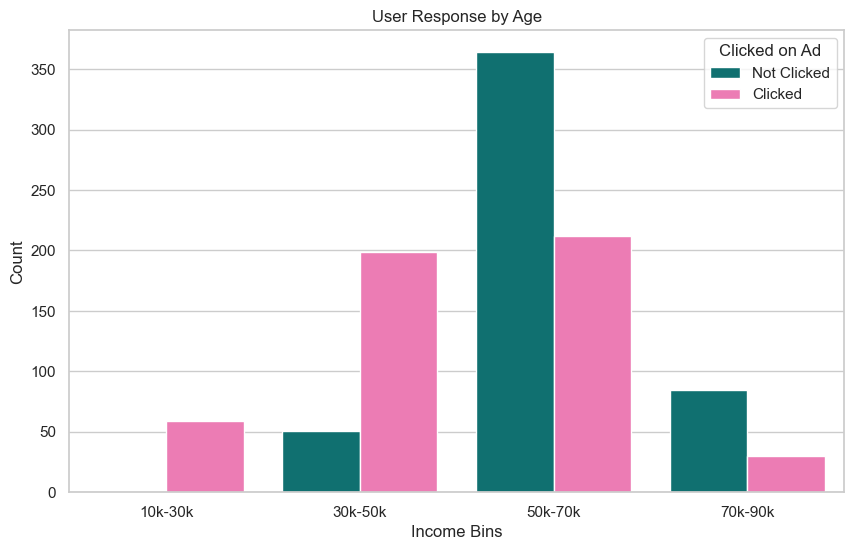

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income Bins', hue='Clicked on Ad', palette=['teal', 'hotpink'])
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.title('User Response by Age')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['Not Clicked', 'Clicked'], facecolor='white')

plt.show()

People with Good Enough Salary do not pay Attention to Advertisements.

In [34]:
internet_usage_bin_edges = [100, 150, 200, 250, 300]
internet_usage_bin_labels = ['100-150', '150-200', '200-250', '250-300']
df['Internet Usage Bins'] = pd.cut(df['Daily Internet Usage'], bins=internet_usage_bin_edges, labels=internet_usage_bin_labels)
print(df[['Daily Internet Usage', 'Internet Usage Bins']].head())

   Daily Internet Usage Internet Usage Bins
0                256.09             250-300
1                193.77             150-200
2                236.50             200-250
3                245.89             200-250
4                225.58             200-250


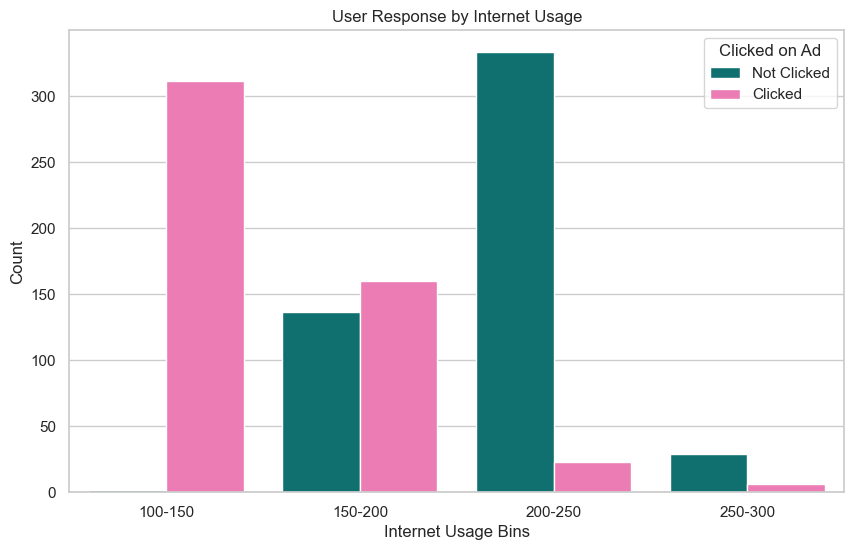

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Internet Usage Bins', hue='Clicked on Ad', palette=['teal', 'hotpink'])
plt.xlabel('Internet Usage Bins')
plt.ylabel('Count')
plt.title('User Response by Internet Usage')
plt.legend(title='Clicked on Ad', loc='upper right', labels=['Not Clicked', 'Clicked'], facecolor='white')

plt.show()

There is Negative relationship between Internet Usage and User Response.

#### Feature Engineering

#### 1. Add New Features

In [36]:
df['Weekday'] = df['Timestamp'].dt.weekday
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [37]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5Thgeneration Orchestration     Wrightburgh     0     Tunisia   
1     Monitored National Standardization       West Jodi     1       Nauru   
2       Organic Bottom-Line Service-Desk        Davidton     0  San Marino   
3  Triple-Buffered Reciprocal Time-Frame  West Terrifurt     1       Italy   
4          Robust Logistical Utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad Time Spent Bins Age Bins Income Bins  \
0 2016-03-27 00:53:00              0           61-80    30-39     50k-70k   
1 2016-04-04 01:39:00              0          81-100    30-39     50k-70k   
2 2016-03-13 20:35:00              0           61-80    20-29     50k-70k   
3 2016-01-10 02:31:00              0           61-80    20-29     50k-70k   
4 2016-06-03 03:36:00              0           61-80    30-39     70k-90k   

  Internet Usage Bins  Weekday  Hour  Month  Year  
0             250-300        6     0      3  2016  
1             150-200        0     1      4  2016  
2             200-250        6    20      3  2016  
3             200-250        6     2      1  2016  
4             200-250        4     3      6  2016

In [38]:
df.drop(columns=['Time Spent Bins', 'Age Bins', 'Income Bins', 'Internet Usage Bins'], inplace=True)

In [39]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5Thgeneration Orchestration     Wrightburgh     0     Tunisia   
1     Monitored National Standardization       West Jodi     1       Nauru   
2       Organic Bottom-Line Service-Desk        Davidton     0  San Marino   
3  Triple-Buffered Reciprocal Time-Frame  West Terrifurt     1       Italy   
4          Robust Logistical Utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad  Weekday  Hour  Month  Year  
0 2016-03-27 00:53:00              0        6     0      3  2016  
1 2016-04-04 01:39:00              0        0     1      4  2016  
2 2016-03-13 20:35:00              0        6    20      3  2016  
3 2016-01-10 02:31:00              0        6     2      1  2016  
4 2016-06-03 03:36:00              0        4     3      6  2016

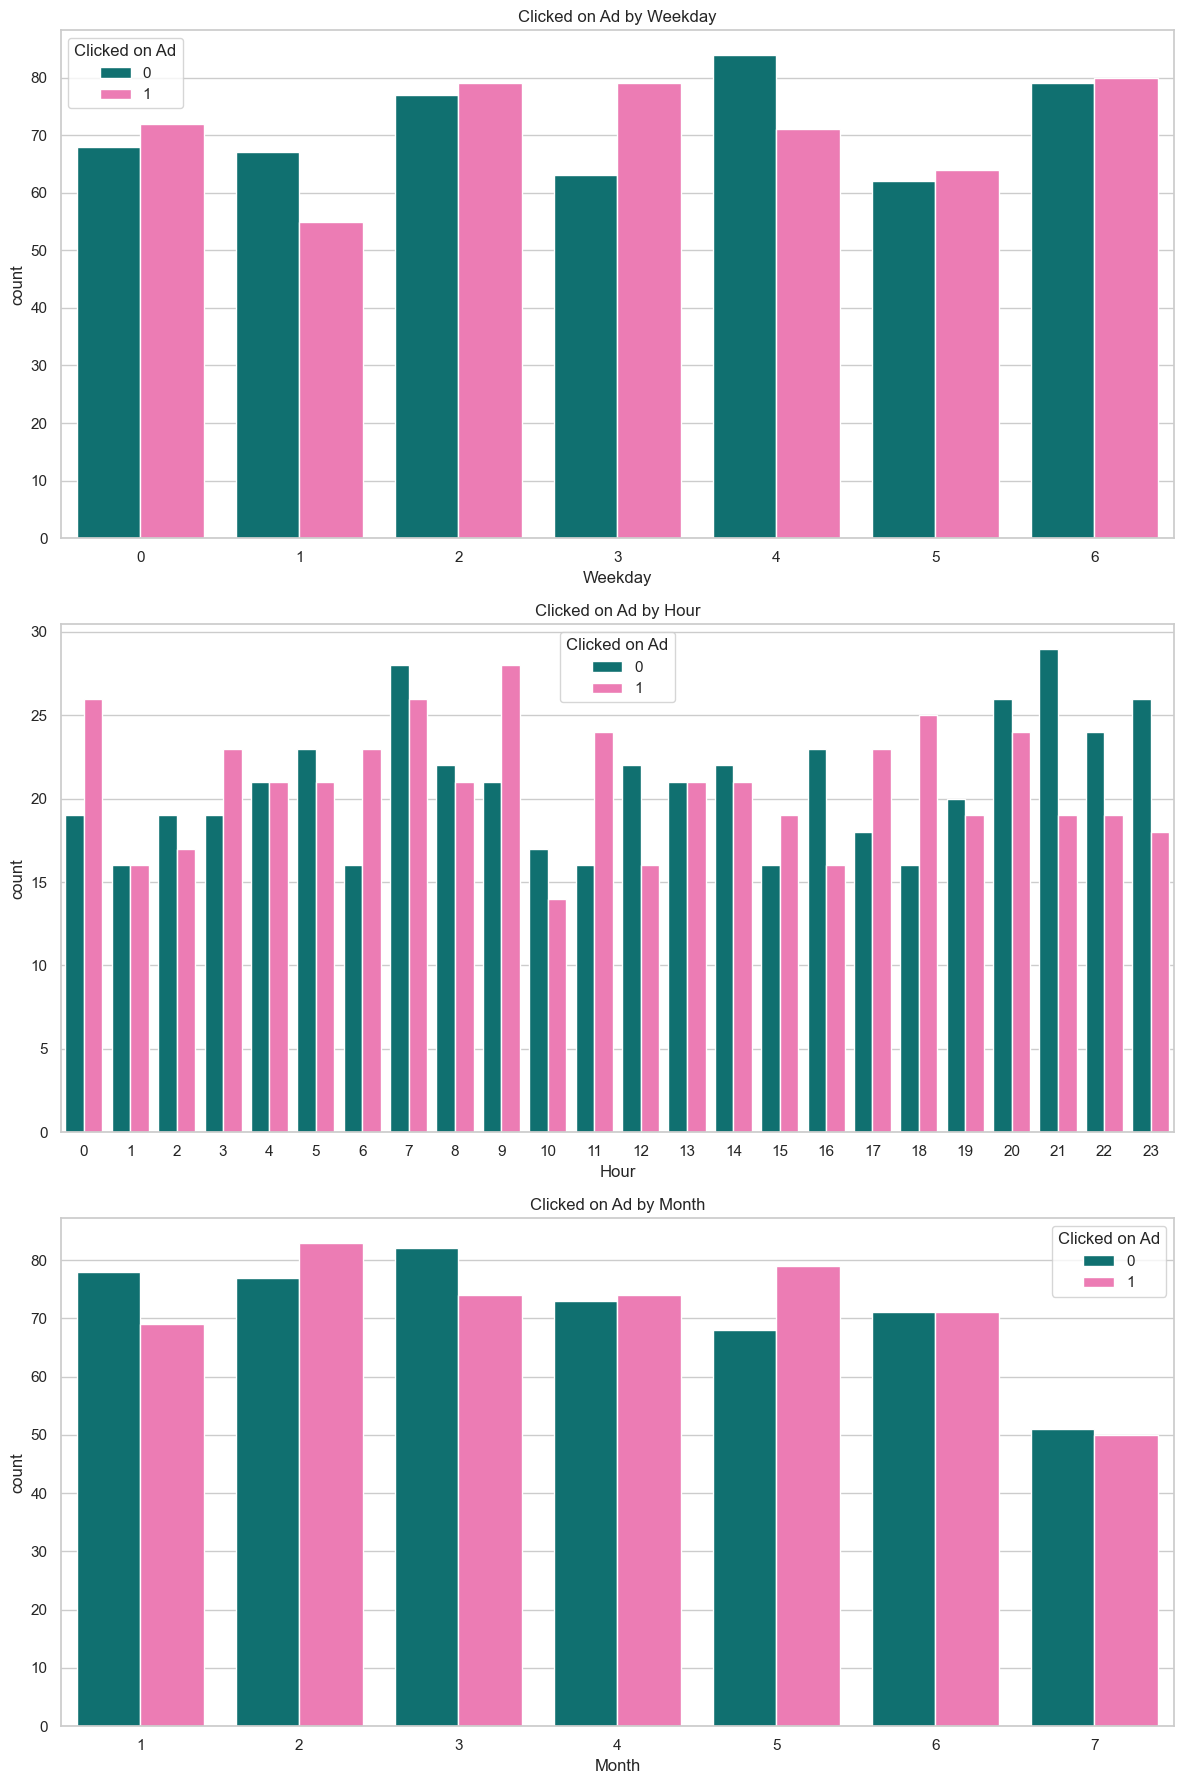

In [40]:
custom_palette = ['teal', 'hotpink']

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for Weekday
sns.countplot(data=df, x='Weekday', hue='Clicked on Ad', ax=axes[0], palette=custom_palette)
axes[0].set_title('Clicked on Ad by Weekday')

# Plot for Hour
sns.countplot(data=df, x='Hour', hue='Clicked on Ad', ax=axes[1], palette=custom_palette)
axes[1].set_title('Clicked on Ad by Hour')

# Plot for Month
sns.countplot(data=df, x='Month', hue='Clicked on Ad', ax=axes[2], palette=custom_palette)
axes[2].set_title('Clicked on Ad by Month')

plt.tight_layout()
plt.show()

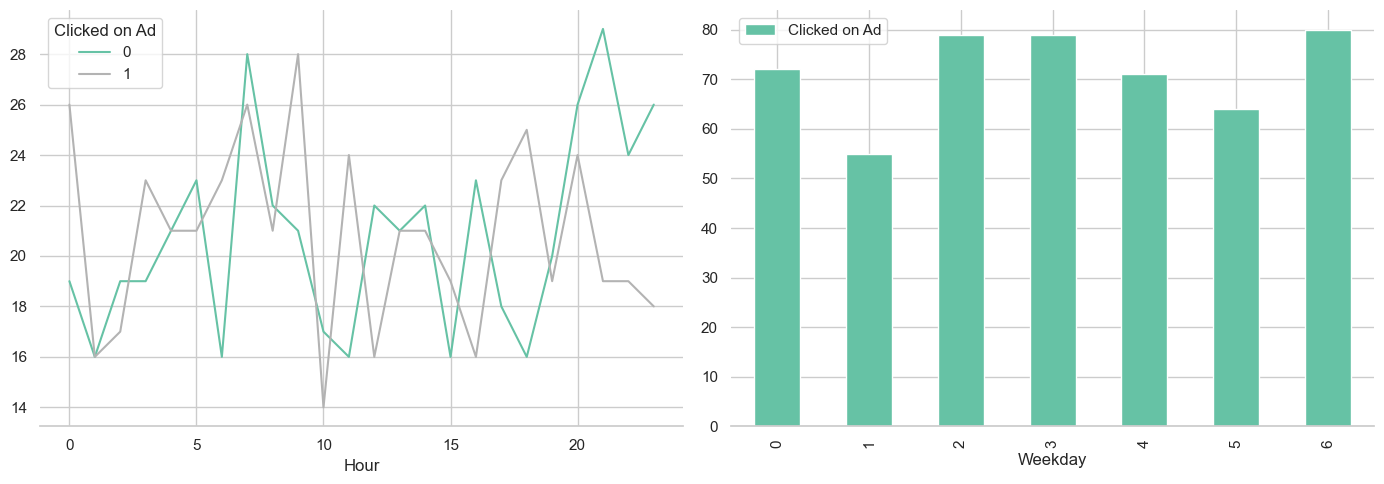

In [41]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0],cmap='Set2')
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1],cmap='Set2') # 0 - Monday
plt.tight_layout()
sns.despine(left=True)
plt.show()

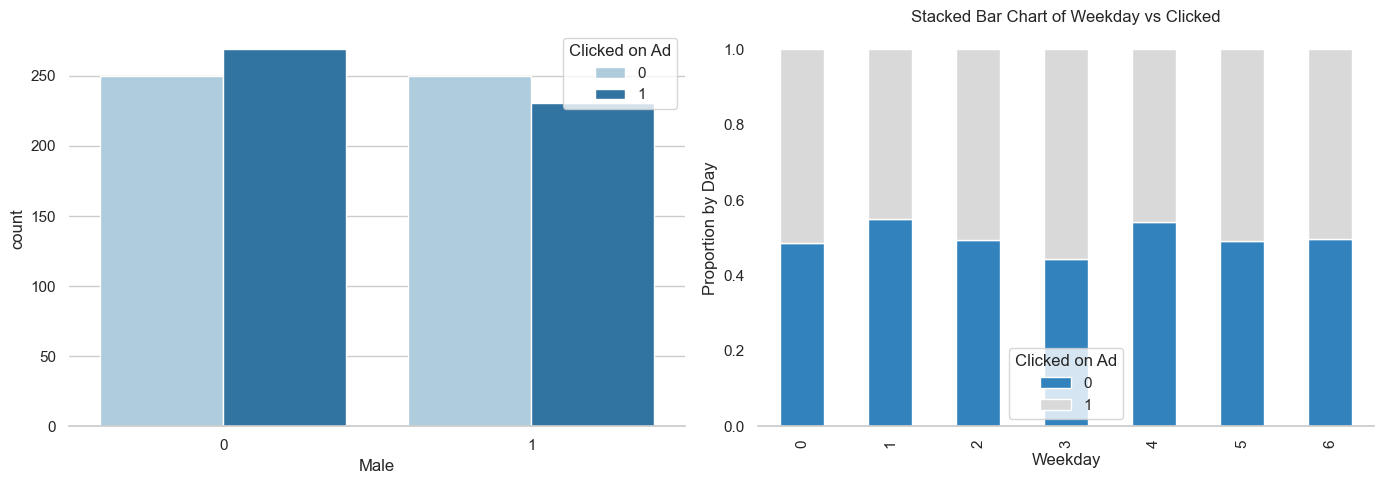

In [42]:

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.despine(left=True)
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='Paired', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(df['Weekday'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False,cmap = "tab20c") # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

In [43]:
print(f'Categorical Features : {categorical_features}')

Categorical Features : ['Ad Topic Line', 'City', 'Country', 'Timestamp']


In [44]:
if 'Timestamp' in categorical_features:
    categorical_features.remove('Timestamp')

In [45]:
df[categorical_features].describe()

Ad Topic Line       City Country
count                                 1000       1000    1000
unique                                1000        969     237
top     Cloned 5Thgeneration Orchestration  Lisamouth  France
freq                                     1          3       9

The dataset has different cities (Unique) with  Mostly Single Frequency. Conclusion, this feature has no or low predictive power.

#### Top City with Daily Time

In [46]:
city_dailytime=pd.DataFrame(df.groupby('City')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['City']).reset_index()
city_dailytime
px.bar(city_dailytime, x='City', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Redor)

#### Top City with Area Income

In [47]:
city_areaincome=pd.DataFrame(df.groupby('City')['Area Income'].mean().sort_values(ascending=False)[:20])
city_areaincome=city_areaincome.rename_axis(['City']).reset_index()
city_areaincome
px.bar(city_areaincome, x='City', y='Area Income',template="none",color_discrete_sequence= px.colors.sequential.Burg)

#### Top City with Average Internet

In [48]:
city_avginternet=pd.DataFrame(df.groupby('City')['Daily Internet Usage'].mean().sort_values(ascending=False)[:20])
city_avginternet=city_avginternet.rename_axis(['City']).reset_index()
city_avginternet
px.bar(city_avginternet, x='City', y='Daily Internet Usage',template="none",color_discrete_sequence= px.colors.sequential.Tealgrn)

In [49]:
df.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False)

Country
France                   9
Czech Republic           9
Afghanistan              8
Australia                8
Turkey                   8
                        ..
Montserrat               1
Mozambique               1
Romania                  1
Saint Kitts and Nevis    1
Aruba                    1
Name: Clicked on Ad, Length: 237, dtype: int64

In [50]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(20)

col_0                   count
Country                      
France                      9
Czech Republic              9
Afghanistan                 8
Australia                   8
Turkey                      8
South Africa                8
Senegal                     8
Peru                        8
Micronesia                  8
Greece                      8
Cyprus                      8
Liberia                     8
Albania                     7
Bosnia and Herzegovina      7
Taiwan                      7
Bahamas                     7
Burundi                     7
Cambodia                    7
Venezuela                   7
Fiji                        7

#### Top Country with Daily Internet Usage

In [51]:
city_avginternet=pd.DataFrame(df.groupby('Country')['Daily Internet Usage'].mean().sort_values(ascending=False)[:20])
city_avginternet=city_avginternet.rename_axis(['Country']).reset_index()
city_avginternet
px.bar(city_avginternet, x='Country', y='Daily Internet Usage',template="none",color_discrete_sequence= px.colors.sequential.Sunsetdark) 


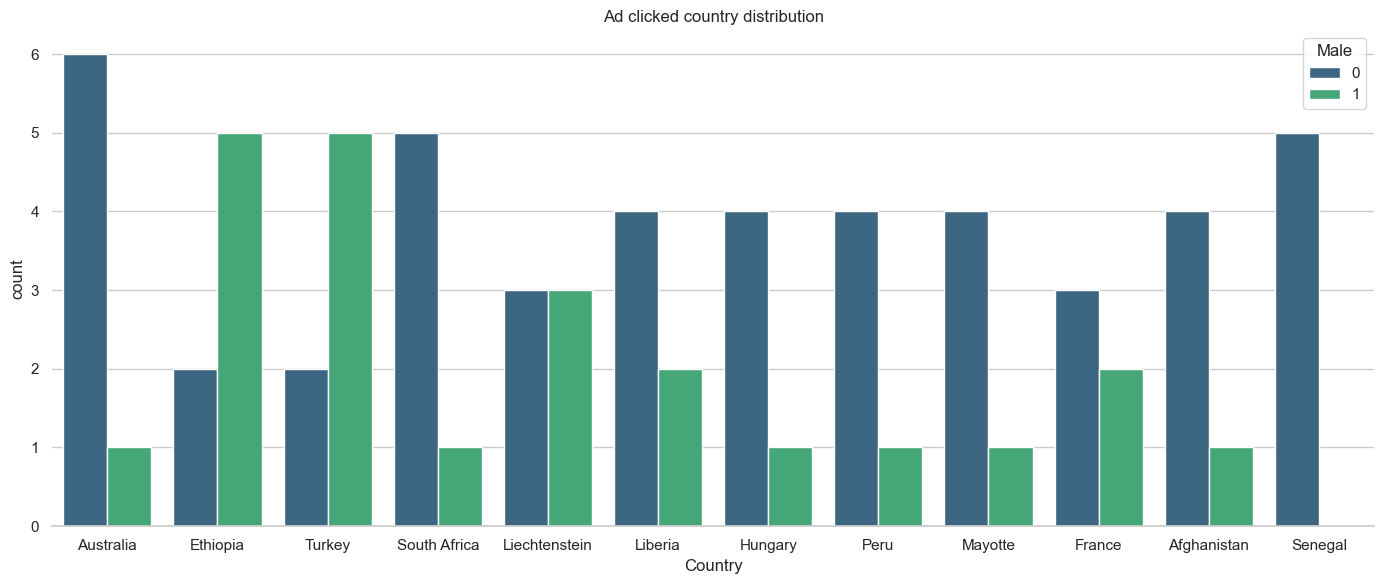

In [52]:
plt.figure(figsize=(14,6))
sns.countplot(x='Country',data=df[df['Clicked on Ad']==1],order=df[df['Clicked on Ad']==1]['Country'].value_counts().index[:12],hue='Male',
              palette='viridis')
plt.title('Ad clicked country distribution')
plt.tight_layout()
sns.despine(left=True)

In [53]:
df[df['Clicked on Ad']==1]['Timestamp'].value_counts().head(5)

Timestamp
2016-03-07 01:40:00    1
2016-01-14 20:58:00    1
2016-02-14 14:38:00    1
2016-07-17 13:22:00    1
2016-03-15 06:54:00    1
Name: count, dtype: int64

In [54]:
df['Ad Topic Line'].nunique()

1000

#### Different Ad Topics

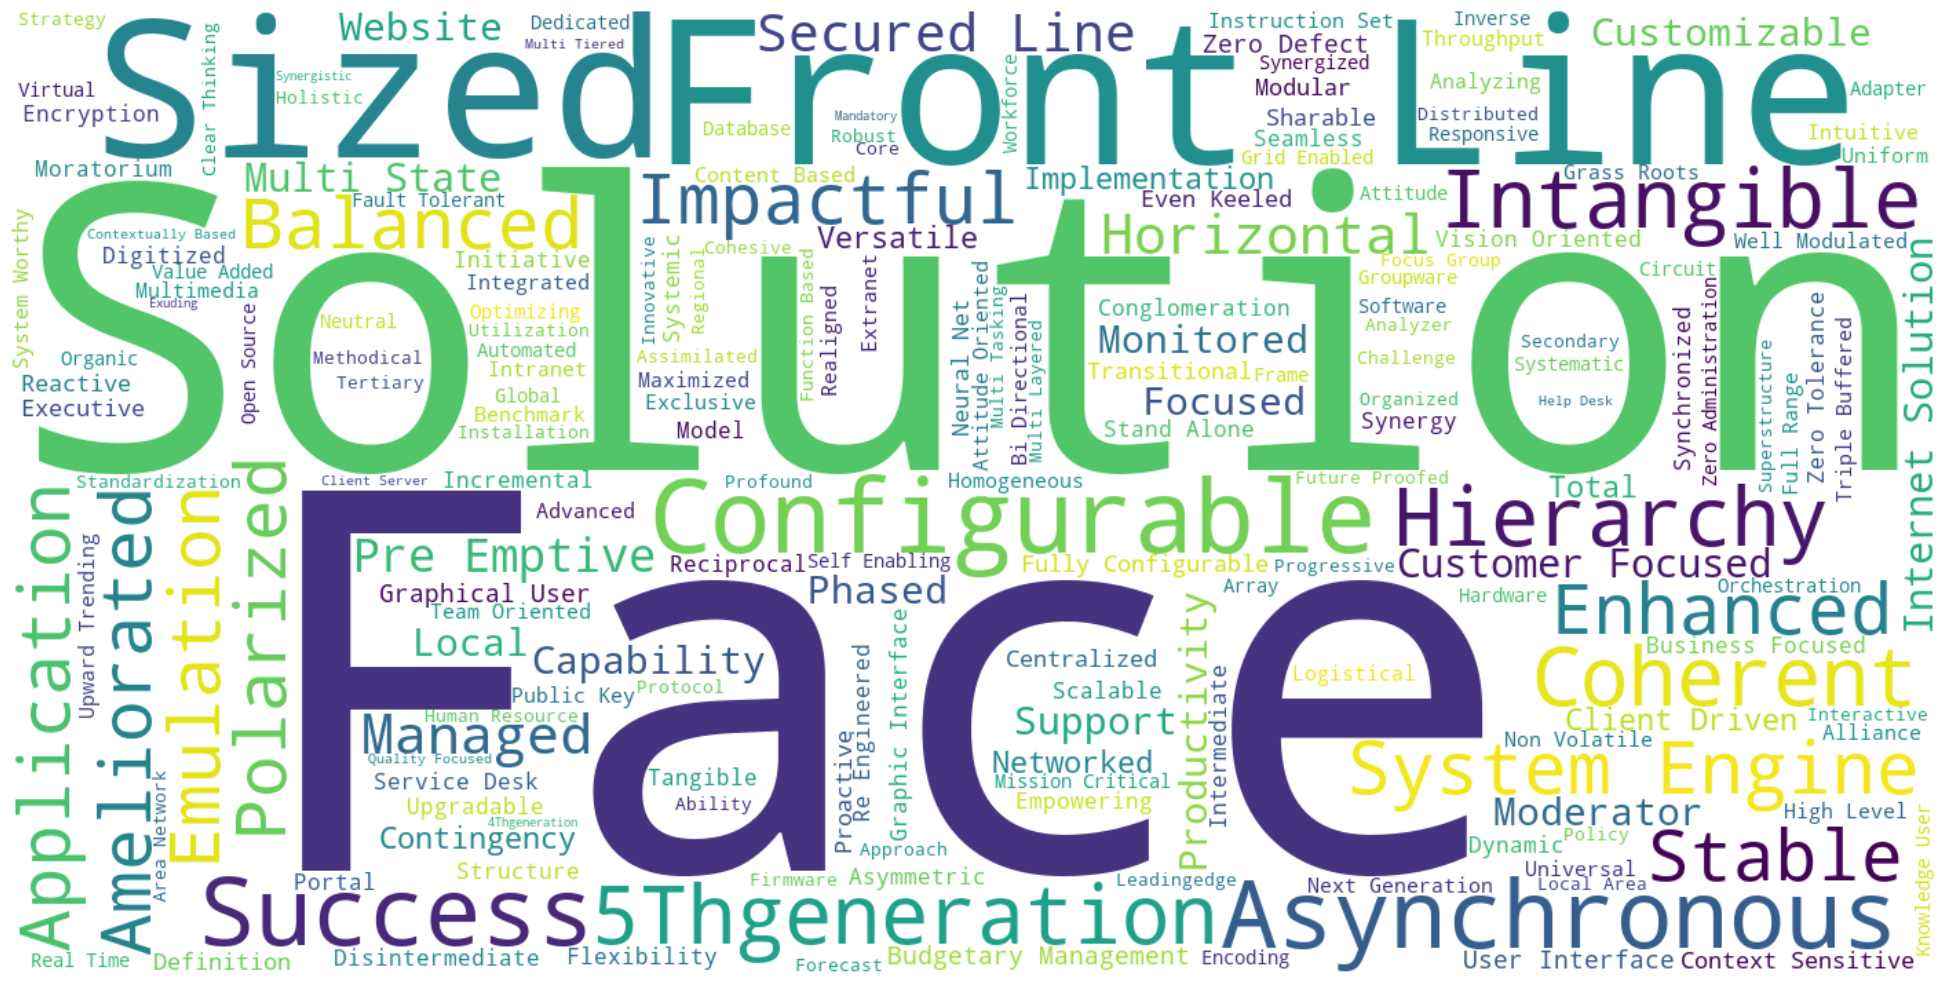

In [55]:
text = ' '.join(topic_line for topic_line in df['Ad Topic Line'])
world_cloud = WordCloud(width=1400, height=700,background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Encoding Categorical Columns

In [56]:
df.drop(columns=['Ad Topic Line', 'City', 'Timestamp', 'Year'], inplace=True)

In [57]:
df.head(1)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35      61833.9                256.09     0   

   Country  Clicked on Ad  Weekday  Hour  Month  
0  Tunisia              0        6     0      3

In [58]:
categorical_columns = ['Country', 'Weekday', 'Hour', 'Month']
df = pd.get_dummies(df, columns=categorical_columns, dtype=int)

In [59]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  Country_Afghanistan  Country_Albania  Country_Algeria  \
0              0                    0                0                0   
1              0                    0                0                0   
2              0                    0                0                0   
3              0                    0                0                0   
4              0                    0                0                0   

   Country_American Samoa  ...  Hour_21  Hour_22  Hour_23  Month_1  Month_2  \
0                       0  ...        0        0        0        0        0   
1                       0  ...        0        0        0        0        0   
2                       0  ...        0        0        0        0        0   
3                       0  ...        0        0        0        1        0   
4                       0  ...        0        0        0        0        0   

   Month_3  Month_4  Month_5  Month_6  Month_7  
0        1        0        0        0        0  
1        0        1        0        0        0  
2        1        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        1        0  

[5 rows x 281 columns]

## Model Building and Evaluation

In [60]:
df.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  Country_Afghanistan  Country_Albania  Country_Algeria  \
0              0                    0                0                0   
1              0                    0                0                0   
2              0                    0                0                0   
3              0                    0                0                0   
4              0                    0                0                0   

   Country_American Samoa  ...  Hour_21  Hour_22  Hour_23  Month_1  Month_2  \
0                       0  ...        0        0        0        0        0   
1                       0  ...        0        0        0        0        0   
2                       0  ...        0        0        0        0        0   
3                       0  ...        0        0        0        1        0   
4                       0  ...        0        0        0        0        0   

   Month_3  Month_4  Month_5  Month_6  Month_7  
0        1        0        0        0        0  
1        0        1        0        0        0  
2        1        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        1        0  

[5 rows x 281 columns]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop('Clicked on Ad', axis=1) 
y = df['Clicked on Ad']  

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 280)
Shape of y: (1000,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
# Standarizing the Features
from  sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 280) (800,)
(200, 280) (200,)


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve

In [66]:
# List for Appending Performance Metric Score
model_result = []

def predict(ml_model, model_name):
    # Fit the Model
    model = ml_model.fit(X_train, y_train)

    # Predicting Values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    '''Evaluation Metrics on Train Data'''
    print('''Evaluation Metrics on Train Data''')
    print(classification_report(y_train, y_train_pred))    
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)    
    print("Confusion Matrix on Train Data:\n")
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix on Train Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    train_auc = roc_auc_score(y_train, y_train_pred)    
    print(f'Train AUC : {train_auc}')

    '''Evaluation Metrics on Test Data'''
    print('''Evaluation Metrics on Test Data''')    
    print(classification_report(y_test, y_test_pred))    
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)    
    print("Confusion Matrix on Test Data:\n")  
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix on Test Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    test_auc = roc_auc_score(y_test, y_test_pred)   
    print(f'Test AUC : {test_auc}')
    print('-'*100)
    
    plt.figure(figsize=(8, 6))
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    print('-'*100)

    '''Actual vs Predicted Value on Test Data'''
    print('''Actual vs Predicted Value on Test Data''')
    d = {'y_actual': y_test, 'y_predict': y_test_pred}
    print(pd.DataFrame(data=d).head(10).T)

    # Calculate accuracy and Append Results to Model_Result List
    test_accuracy = accuracy_score(y_test, y_test_pred)
    model_result.append({'model': model_name,
                         'accuracy': test_accuracy})

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [68]:
from sklearn.model_selection import GridSearchCV
logistic_regression = LogisticRegression()


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# Create GridSearchCV Object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV Object to the Data
grid_search.fit(X_train, y_train)

# Print the Best Parameter and its Corresponding Accuracy
print("Best Parameter:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameter: {'C': 0.1}
Best Accuracy: 0.9574999999999999


Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       1.00      0.97      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Confusion Matrix on Train Data:



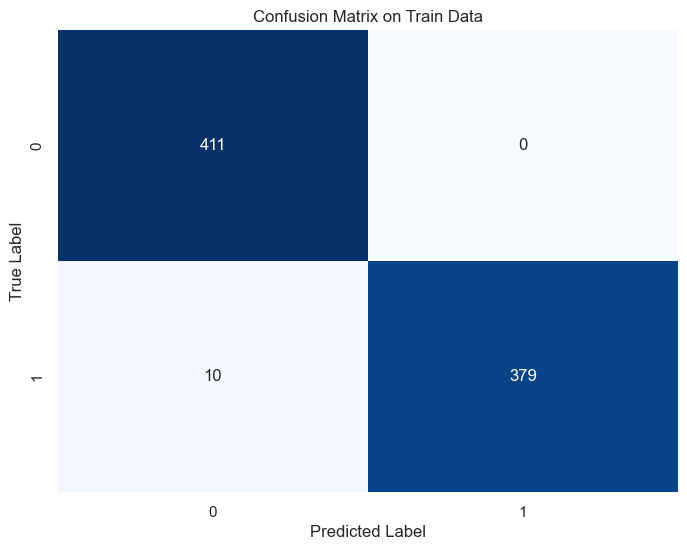

Train AUC : 0.987146529562982
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        89
           1       0.97      0.88      0.92       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200

Confusion Matrix on Test Data:



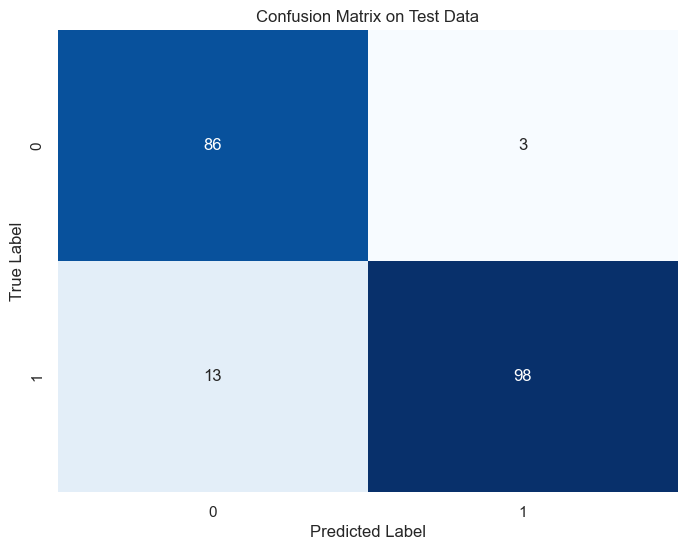

Test AUC : 0.9245875088571718
----------------------------------------------------------------------------------------------------


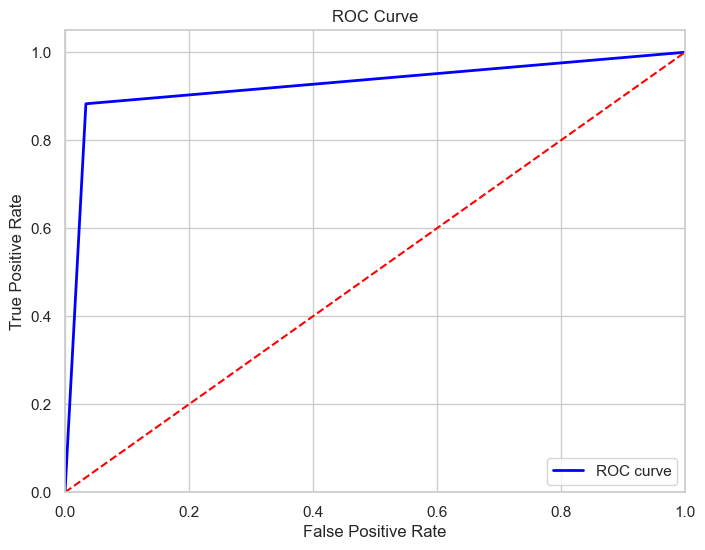

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    1    0    0    0    1    0    1


In [69]:
predict(LogisticRegression(C=0.01), 'LogisticRegression')

#### 2. Decision Tree Classifier

In [70]:
# Define the Parameter Grid
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the Model to the Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [71]:
dt_optimal_model = grid_search.best_estimator_
dt_optimal_model

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       1.00      0.97      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Confusion Matrix on Train Data:



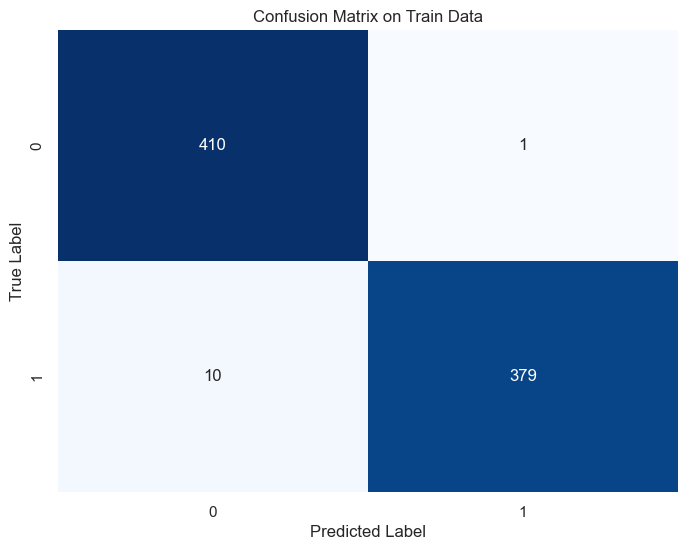

Train AUC : 0.9859299845508165
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        89
           1       0.93      0.93      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix on Test Data:



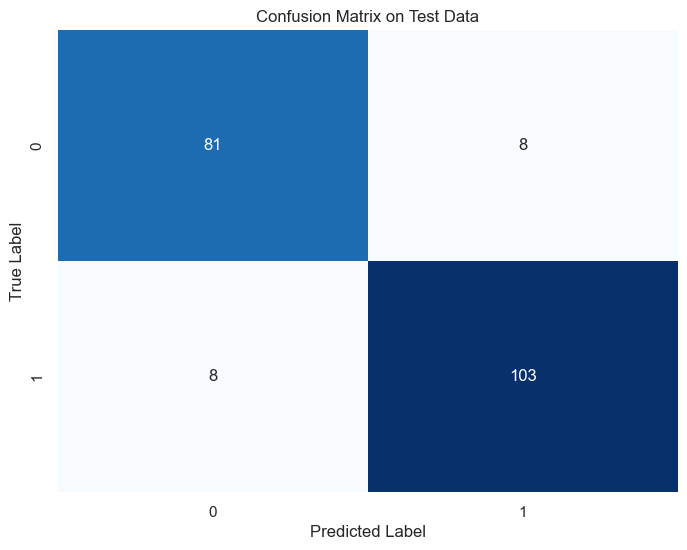

Test AUC : 0.9190201437392448
----------------------------------------------------------------------------------------------------


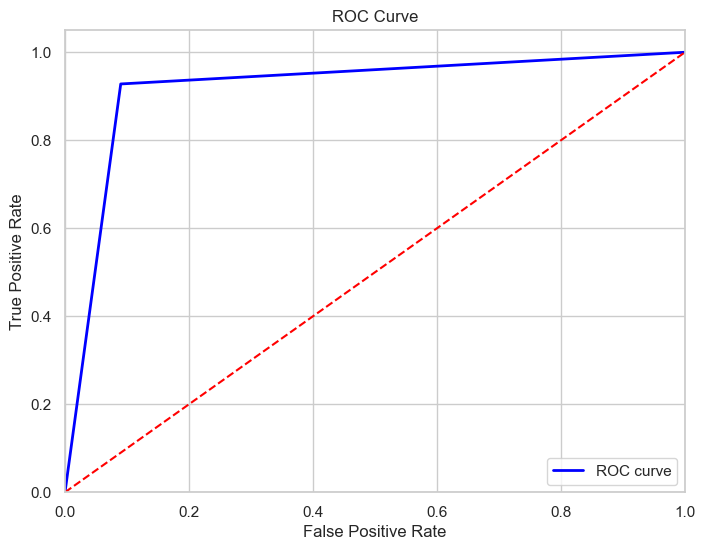

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    1    0    0    0    1    0    1


In [72]:
predict(dt_optimal_model, 'DecisionTreeClassifier')

#### 3. Random Forest Classifier

In [73]:
# Define the Parameter Grid
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the Model to the Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [74]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestClassifier(max_depth=20, min_samples_split=5)

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       411
           1       1.00      0.99      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix on Train Data:



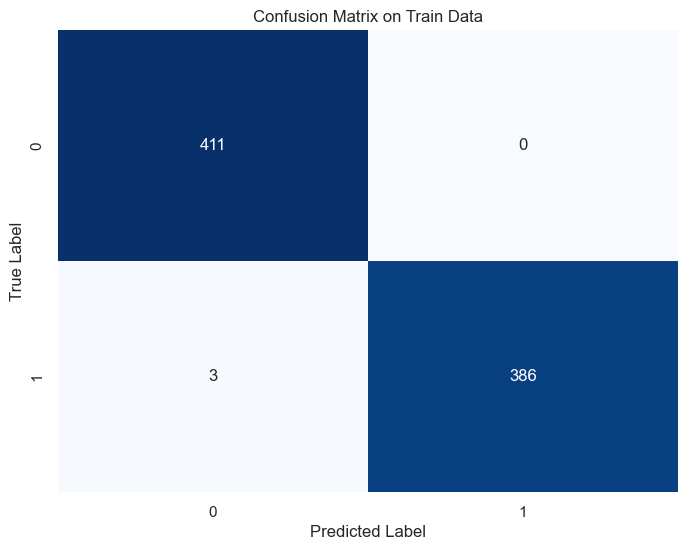

Train AUC : 0.9961439588688946
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        89
           1       0.93      0.95      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix on Test Data:



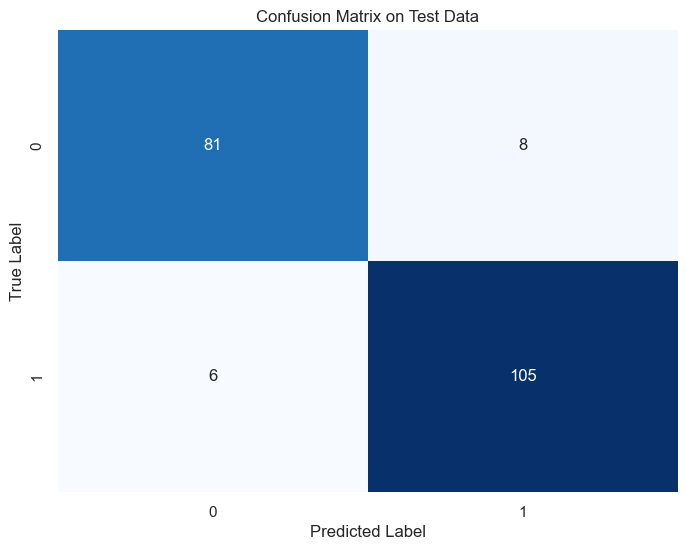

Test AUC : 0.9280291527482539
----------------------------------------------------------------------------------------------------


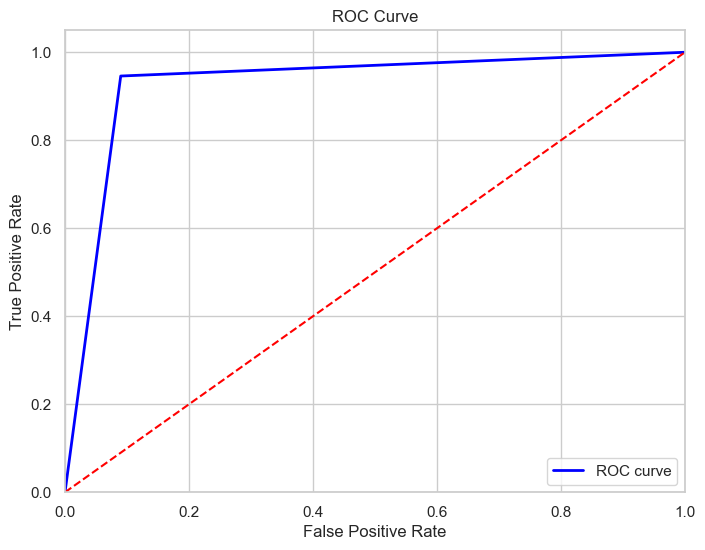

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    1    0    1    0    1    0    1


In [75]:
predict(rf_optimal_model, 'RandomForestClassifier')

#### 4. SVC

In [76]:
# Define the Parameter Grid
param_grid = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 0.01, 0.001], 
    'kernel': ['linear', 'rbf']
}

# Create a Support Vector Classifier
svc_classifier = SVC()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the Model to the Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [77]:
svc_optimal_model = grid_search.best_estimator_
svc_optimal_model

SVC(C=10, gamma=0.001)

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      0.99      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Confusion Matrix on Train Data:



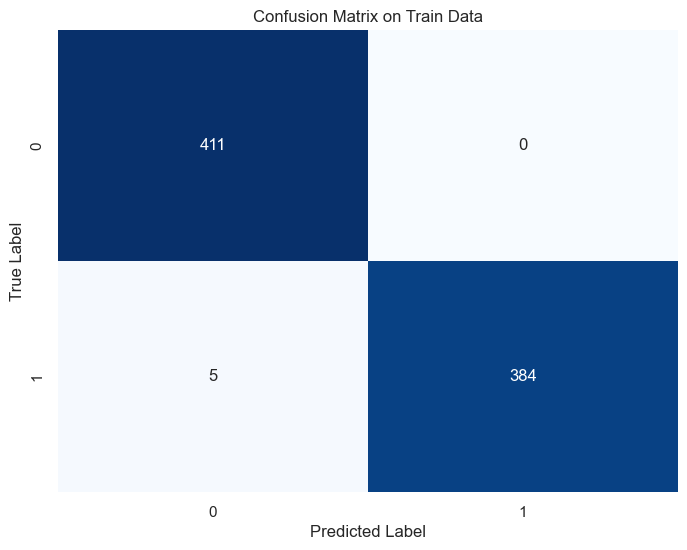

Train AUC : 0.993573264781491
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        89
           1       0.96      0.88      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix on Test Data:



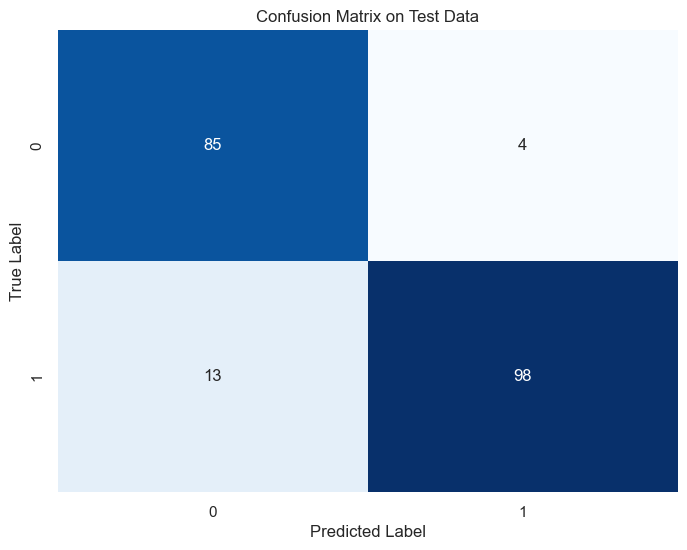

Test AUC : 0.9189695313290818
----------------------------------------------------------------------------------------------------


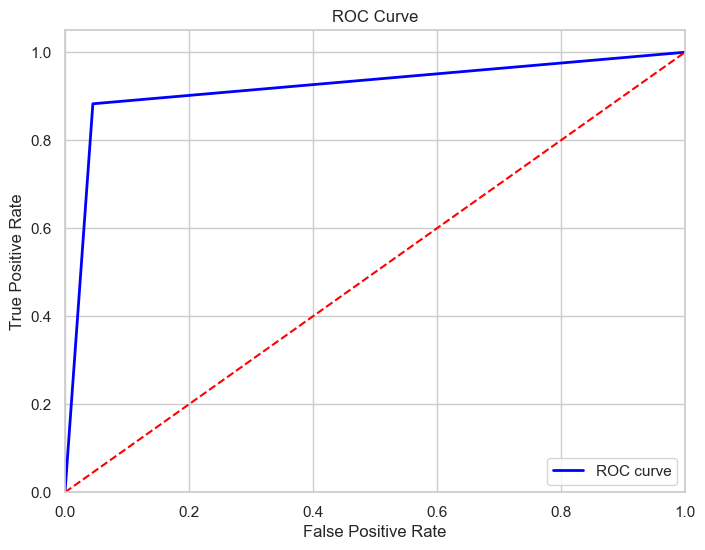

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    1    0    0    0    1    0    1


In [78]:
predict(svc_optimal_model, 'SVC')

#### 5. KNN

In [79]:
# Define the Parameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Model to the Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [80]:
knn_optimal_model = grid_search.best_estimator_
knn_optimal_model

KNeighborsClassifier(n_neighbors=7)

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       411
           1       0.74      0.76      0.75       389

    accuracy                           0.76       800
   macro avg       0.75      0.76      0.75       800
weighted avg       0.76      0.76      0.76       800

Confusion Matrix on Train Data:



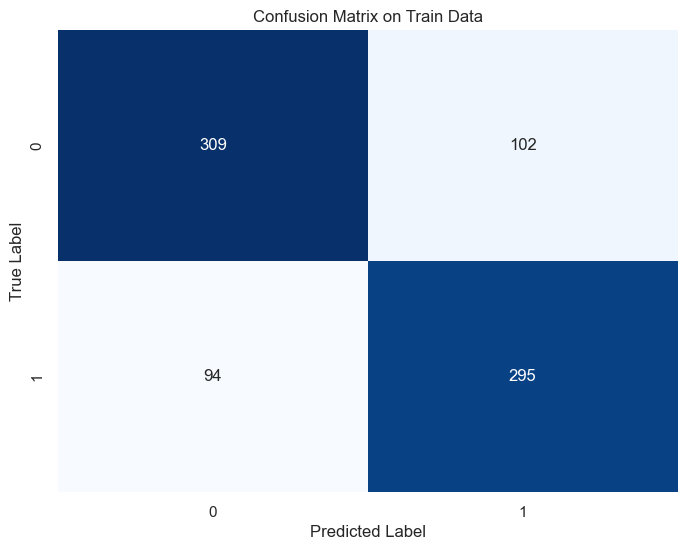

Train AUC : 0.7550897866511549
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        89
           1       0.66      0.60      0.63       111

    accuracy                           0.60       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.61      0.60      0.61       200

Confusion Matrix on Test Data:



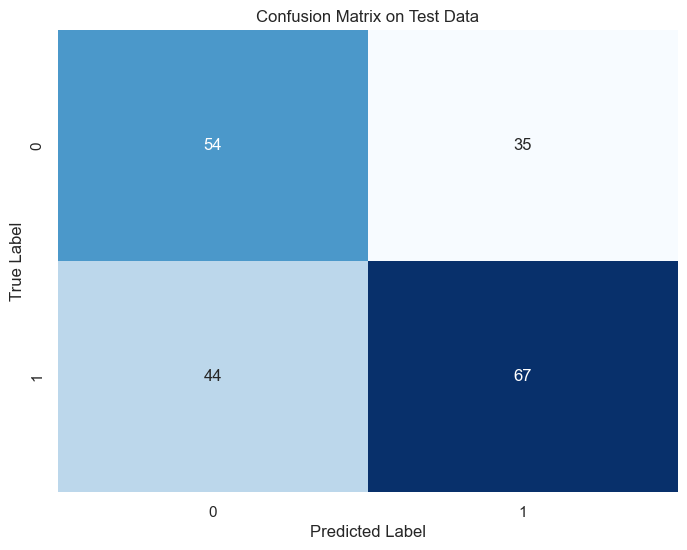

Test AUC : 0.6051725883186557
----------------------------------------------------------------------------------------------------


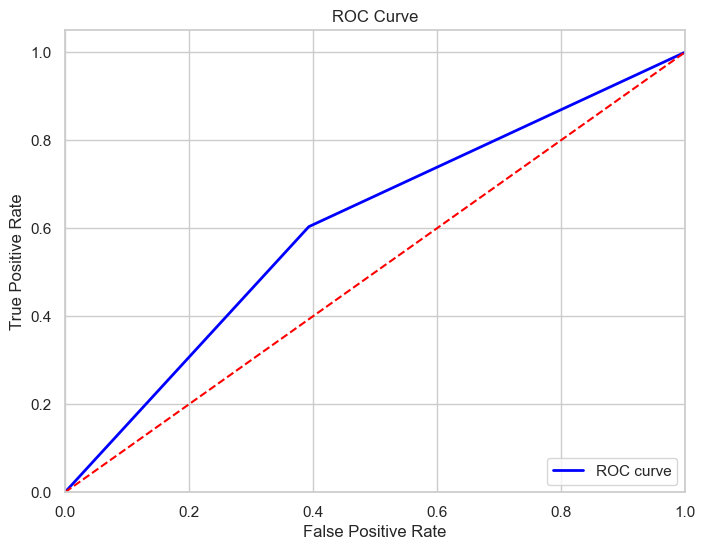

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    0    0    0    0    1    0    1


In [81]:
predict(knn_optimal_model, 'KNeighborsClassifier')

#### 6. GaussianNB

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       0.83      0.47      0.60       411
           1       0.62      0.90      0.73       389

    accuracy                           0.68       800
   macro avg       0.72      0.69      0.67       800
weighted avg       0.73      0.68      0.67       800

Confusion Matrix on Train Data:



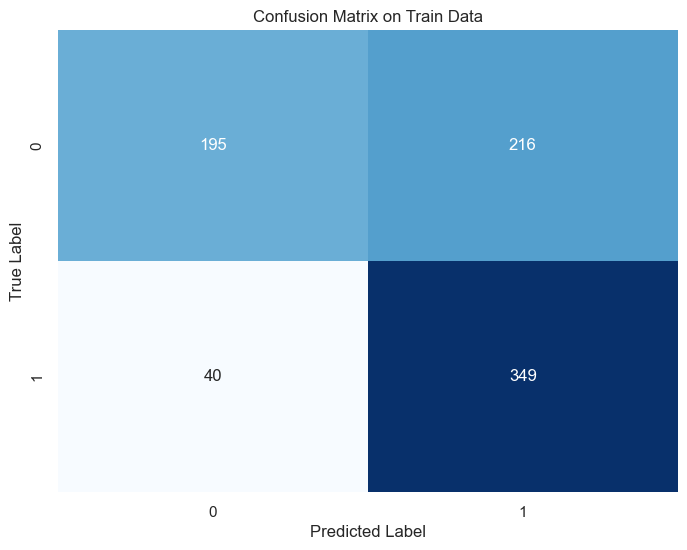

Train AUC : 0.6858123956241907
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.42      0.34      0.37        89
           1       0.54      0.62      0.58       111

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.49      0.49       200

Confusion Matrix on Test Data:



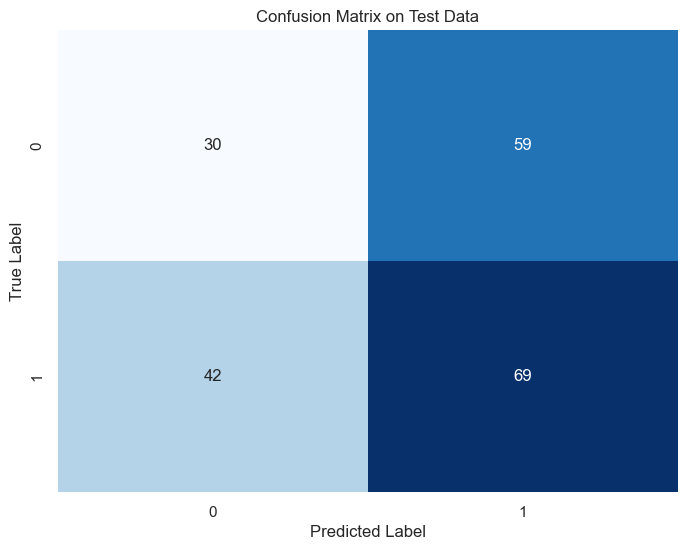

Test AUC : 0.47935013665350745
----------------------------------------------------------------------------------------------------


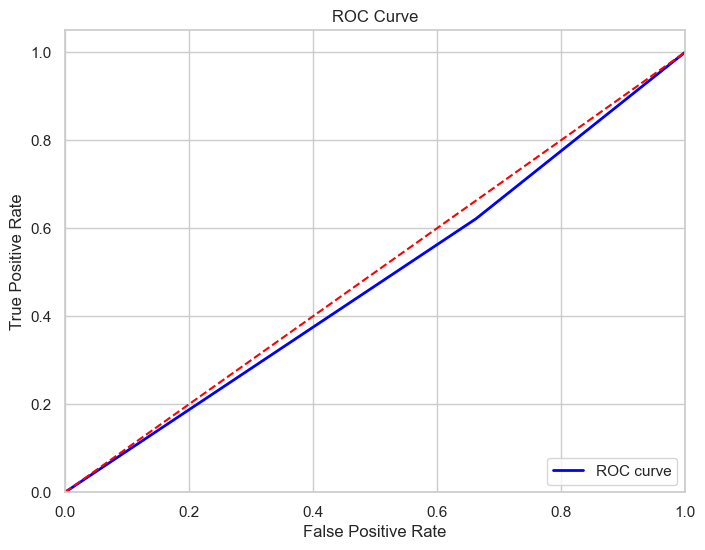

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    0    1    0    1    1    1    1    0    1


In [82]:
predict(GaussianNB(), 'GaussianNB')

#### 7.Gradient Boosting Classifier

In [83]:
sample_data = df.sample(n=100, random_state=42)

# Split the Sample into Features (X) and the Target Variable (y)
X_sample = sample_data.drop('Clicked on Ad', axis=1)
y_sample = sample_data['Clicked on Ad']

In [84]:
# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.1, 0.01, 0.001], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Model to the Training Data
grid_search.fit(X_sample, y_sample)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [85]:
gb_optimal_model = grid_search.best_estimator_
gb_optimal_model

GradientBoostingClassifier(max_depth=5, min_samples_leaf=3)

Evaluation Metrics on Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix on Train Data:



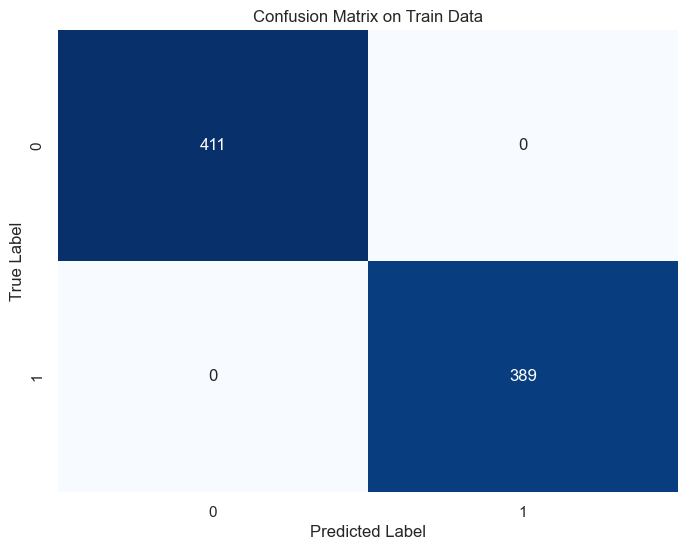

Train AUC : 1.0
Evaluation Metrics on Test Data
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        89
           1       0.92      0.93      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200

Confusion Matrix on Test Data:



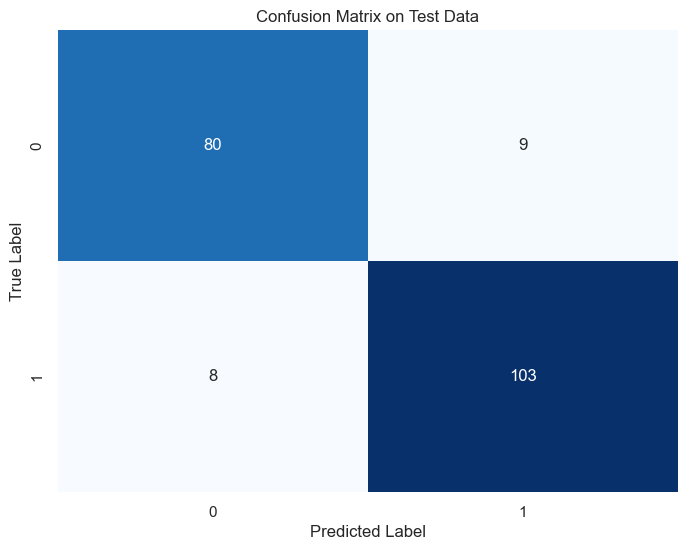

Test AUC : 0.9134021662111549
----------------------------------------------------------------------------------------------------


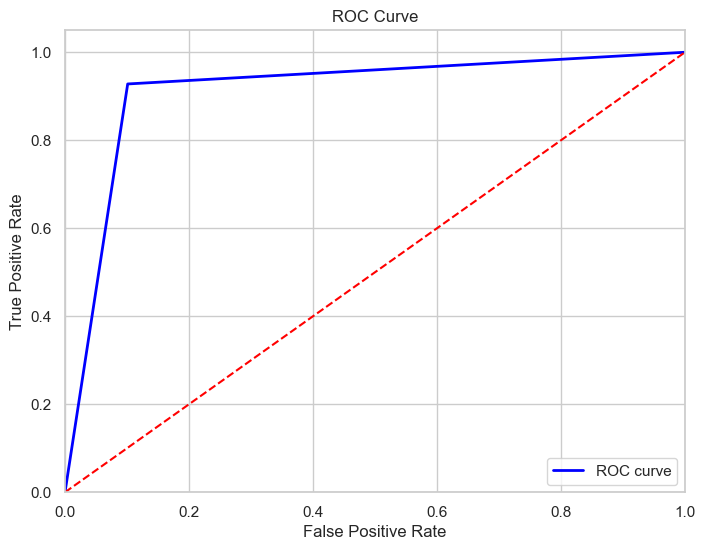

----------------------------------------------------------------------------------------------------
Actual vs Predicted Value on Test Data
           521  737  740  660  411  678  626  513  859  136
y_actual     1    1    1    1    0    0    0    1    0    1
y_predict    1    1    1    1    0    1    0    1    0    1


In [86]:
predict(gb_optimal_model, 'GradientBoostingClassifier')

### Model Result

In [87]:
model_result = pd.DataFrame(model_result)
# Sorting the Values by Test Accuracy Score
model_result.sort_values(by='accuracy', ascending=False)

model  accuracy
2      RandomForestClassifier     0.930
0          LogisticRegression     0.920
1      DecisionTreeClassifier     0.920
3                         SVC     0.915
6  GradientBoostingClassifier     0.915
4        KNeighborsClassifier     0.605
5                  GaussianNB     0.495

Random Forest performs the best out of All Models.

#### Model Explainability - Random Forest

In [88]:
feature_importances = rf_optimal_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in Descending Order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
top_features

Feature  Importance
3        Daily Internet Usage    0.328232
0    Daily Time Spent on Site    0.242864
1                         Age    0.129484
2                 Area Income    0.110853
17          Country_Australia    0.003448
100           Country_Hungary    0.003271
57               Country_Cuba    0.003048
4                        Male    0.002972
125     Country_Liechtenstein    0.002875
248                 Weekday_6    0.002824

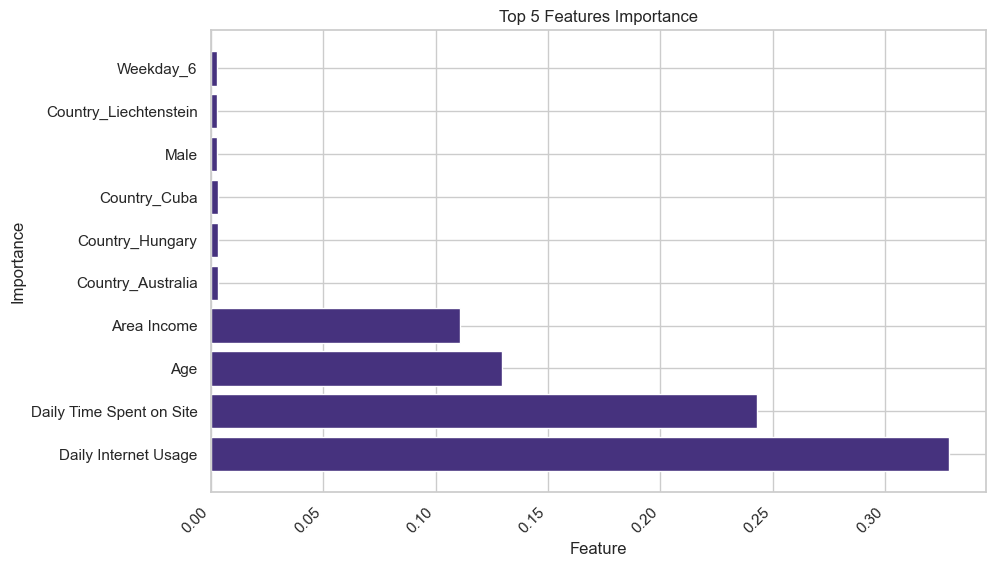

In [89]:
sns.set_style("whitegrid")
sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Features Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

We are going to build Random Forest using Top 5 Features .

### Save the Model

In [90]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  Country_Afghanistan  Country_Albania  Country_Algeria  \
0              0                    0                0                0   
1              0                    0                0                0   
2              0                    0                0                0   
3              0                    0                0                0   
4              0                    0                0                0   

   Country_American Samoa  ...  Hour_21  Hour_22  Hour_23  Month_1  Month_2  \
0                       0  ...        0        0        0        0        0   
1                       0  ...        0        0        0        0        0   
2                       0  ...        0        0        0        0        0   
3                       0  ...        0        0        0        1        0   
4                       0  ...        0        0        0        0        0   

   Month_3  Month_4  Month_5  Month_6  Month_7  
0        1        0        0        0        0  
1        0        1        0        0        0  
2        1        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        1        0  

[5 rows x 281 columns]

In [91]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [92]:
X

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]

In [93]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [94]:
X = scaler.fit_transform(X)

In [95]:
rf_model=rf_optimal_model.fit(X, y)

In [96]:
import pickle
with open('RF_Model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [97]:
with open("Scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)